# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import matplotlib.patches as mpatches
import matplotlib.colors as colors

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.info(), df_pct_poverty.info(), df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null 

(None, None, None)

In [6]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [7]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
df_hh_income.isnull().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [9]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

In [10]:
df_hh_income.isnull().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [11]:
df_pct_poverty.isnull().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [12]:
df_pct_completed_hs.isnull().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [13]:
df_share_race_city.isnull().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [14]:
df_fatalities.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [15]:
df_fatalities.armed.isnull().any().sum()

1

In [16]:
df_fatalities.race.isnull().any().sum()

1

In [17]:
df_fatalities.flee.isnull().any().sum()

1

In [18]:
# CHECK DUPLICATE ROWS
df_hh_income.duplicated().values.any()

False

In [19]:
df_pct_poverty.duplicated().values.any()

False

In [20]:
df_pct_completed_hs.duplicated().values.any()

False

In [21]:
df_share_race_city.duplicated().values.any()

False

In [22]:
df_fatalities.duplicated().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [23]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [24]:
df_pct_poverty['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [25]:
df_pct_poverty.poverty_rate.unique()
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

In [26]:
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
poverty

Geographic Area
MS   26.88
AZ   25.67
GA   23.78
NM   23.08
AR   22.96
LA   22.34
SC   22.16
WV   21.13
OK   20.66
AL   20.65
MO   20.11
KY   20.08
TX   19.92
TN   19.89
AK   19.85
NC   19.75
ID   18.24
DC   18.00
MI   17.90
FL   17.57
CA   17.12
ME   16.89
OR   16.52
MT   16.51
SD   16.03
IN   15.50
WA   15.02
OH   14.85
KS   14.76
VA   14.59
IL   13.88
VT   13.79
MN   13.75
HI   13.40
CO   13.36
NE   12.98
WI   12.86
NH   12.66
DE   12.56
PA   12.52
NV   12.47
IA   12.29
ND   12.16
UT   11.98
NY   11.67
RI   10.37
MD   10.31
WY    9.89
MA    9.59
CT    9.14
NJ    8.19
Name: poverty_rate, dtype: float64

/tmp/ipykernel_146210/3192222547.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


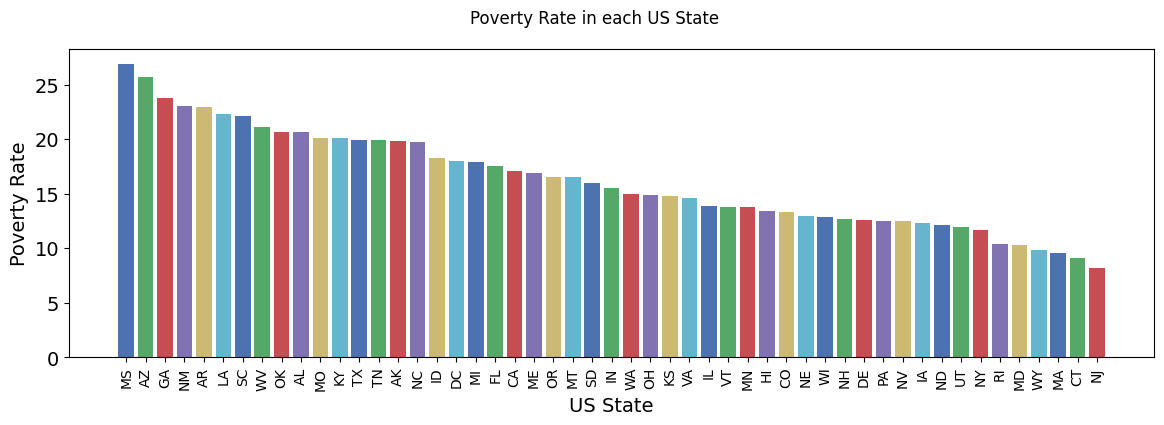

In [27]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty.index[n], poverty[n])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [28]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [29]:
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

In [30]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)
graduation

Geographic Area
MA   92.40
WY   92.10
HI   91.67
UT   91.62
CT   91.59
ME   91.43
NJ   90.85
NH   90.71
NY   90.61
MT   90.49
WI   90.26
IA   90.11
CO   90.11
NE   89.99
VT   89.98
MN   89.47
DC   89.30
MI   89.21
PA   89.02
RI   88.82
DE   88.52
IL   88.48
MD   88.42
OH   88.34
OR   88.30
KS   88.23
WA   88.20
ND   87.82
SD   87.75
NV   87.72
IN   86.32
FL   85.74
ID   85.17
VA   84.88
AK   84.63
MO   83.52
NC   83.25
OK   82.91
KY   82.37
WV   82.35
CA   81.96
TN   81.63
NM   80.98
SC   80.85
AZ   80.47
AL   80.30
AR   79.95
LA   79.29
GA   79.01
MS   78.47
TX   75.69
Name: percent_completed_hs, dtype: float64

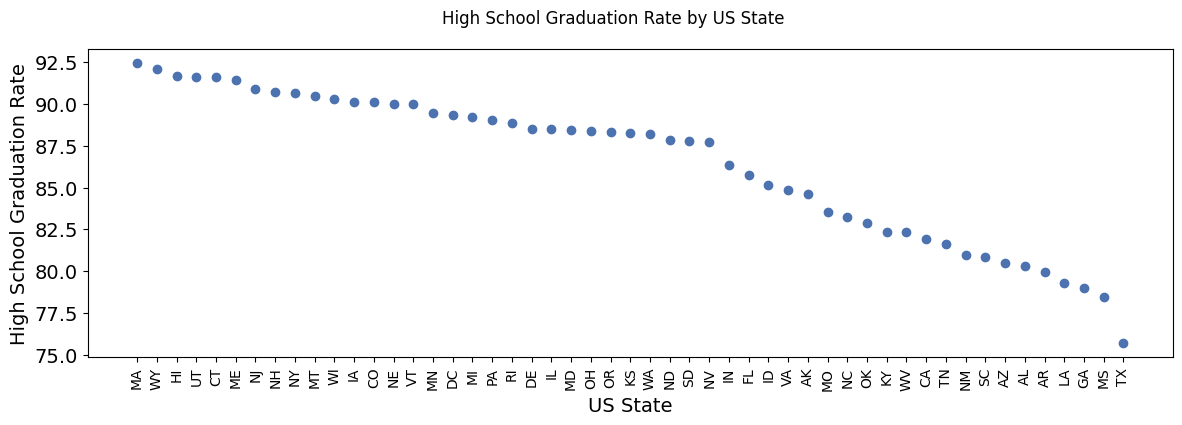

In [31]:
plt.figure(figsize=(14,4))
plt.suptitle('High School Graduation Rate by US State')
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.scatter(graduation.index, graduation)

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [32]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
graduation_vs

Geographic Area
AK   84.63
AL   80.30
AR   79.95
AZ   80.47
CA   81.96
CO   90.11
CT   91.59
DC   89.30
DE   88.52
FL   85.74
GA   79.01
HI   91.67
IA   90.11
ID   85.17
IL   88.48
IN   86.32
KS   88.23
KY   82.37
LA   79.29
MA   92.40
MD   88.42
ME   91.43
MI   89.21
MN   89.47
MO   83.52
MS   78.47
MT   90.49
NC   83.25
ND   87.82
NE   89.99
NH   90.71
NJ   90.85
NM   80.98
NV   87.72
NY   90.61
OH   88.34
OK   82.91
OR   88.30
PA   89.02
RI   88.82
SC   80.85
SD   87.75
TN   81.63
TX   75.69
UT   91.62
VA   84.88
VT   89.98
WA   88.20
WI   90.26
WV   82.35
WY   92.10
Name: percent_completed_hs, dtype: float64

In [33]:
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
poverty_vs

Geographic Area
AK   19.85
AL   20.65
AR   22.96
AZ   25.67
CA   17.12
CO   13.36
CT    9.14
DC   18.00
DE   12.56
FL   17.57
GA   23.78
HI   13.40
IA   12.29
ID   18.24
IL   13.88
IN   15.50
KS   14.76
KY   20.08
LA   22.34
MA    9.59
MD   10.31
ME   16.89
MI   17.90
MN   13.75
MO   20.11
MS   26.88
MT   16.51
NC   19.75
ND   12.16
NE   12.98
NH   12.66
NJ    8.19
NM   23.08
NV   12.47
NY   11.67
OH   14.85
OK   20.66
OR   16.52
PA   12.52
RI   10.37
SC   22.16
SD   16.03
TN   19.89
TX   19.92
UT   11.98
VA   14.59
VT   13.79
WA   15.02
WI   12.86
WV   21.13
WY    9.89
Name: poverty_rate, dtype: float64

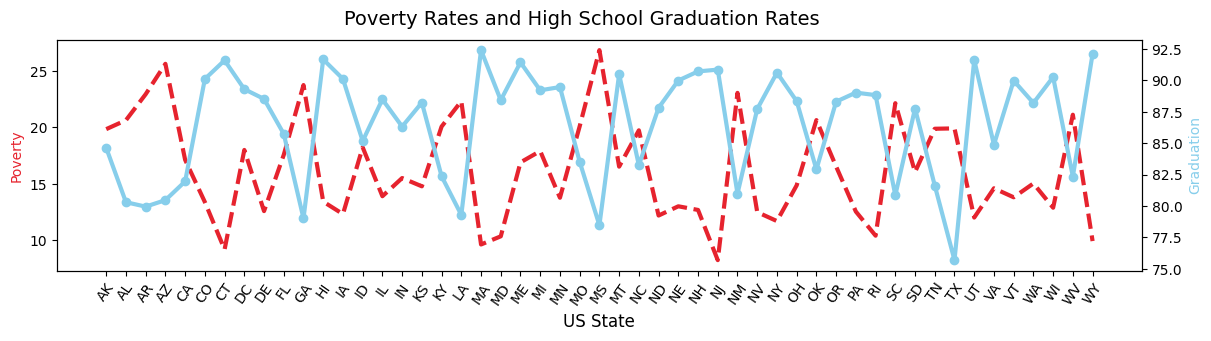

In [34]:
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Graduation', color='skyblue') # or a named colour
 
ax1.plot(poverty_vs.index, poverty_vs, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='skyblue', linewidth=3, marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [35]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)
poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

In [36]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)
hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

In [37]:
merged = pd.merge(hs, poverty, on=['Geographic Area'], how='inner')

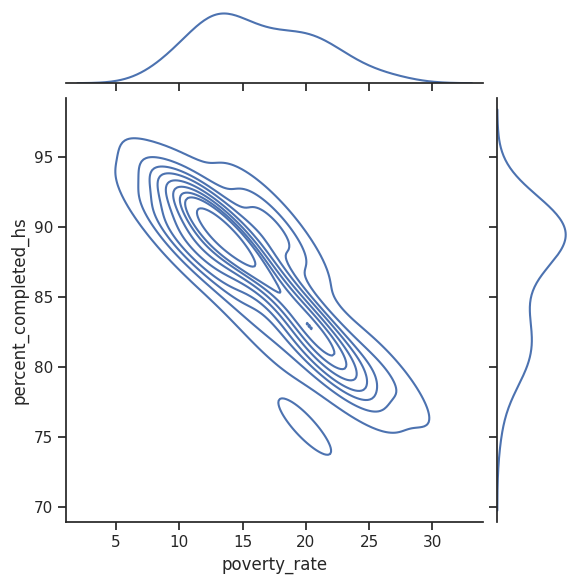

In [38]:
sns.set_theme(style="ticks")

sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

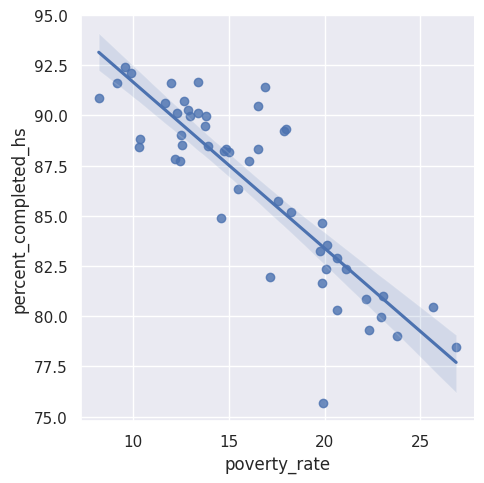

In [39]:
sns.set_theme(color_codes=True)

sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

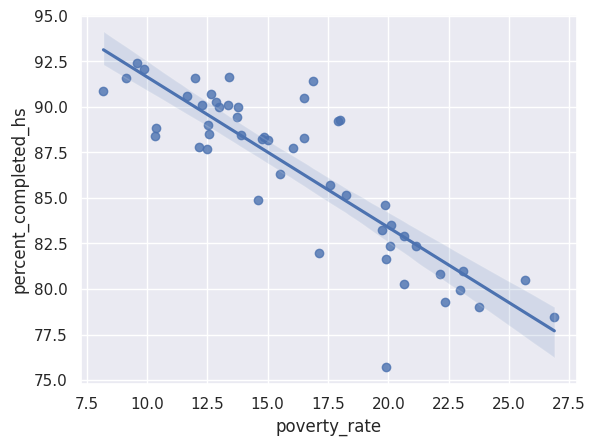

In [40]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [41]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [42]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

In [43]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


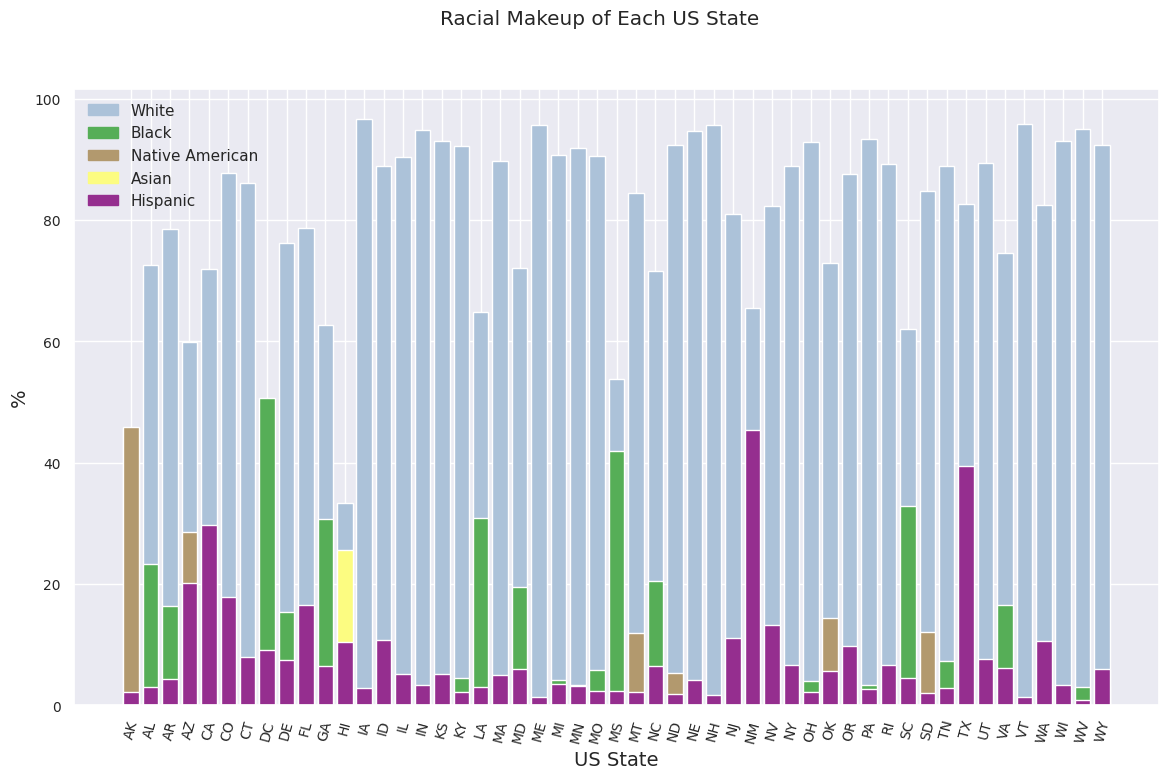

In [44]:
x_indexes = np.arange(len(racial))

color_list = list(colors._colors_full_map.values())

plt.figure(figsize=(14,8))
plt.suptitle('Racial Makeup of Each US State')
plt.ylabel('%', fontsize=14)
plt.xlabel('US State', fontsize=14)

labels = []
for n in range(len(racial)):
    plt.bar(racial.index[n], racial['share_white'][n], color=color_list[0])
    plt.bar(racial.index[n], racial['share_black'][n], color=color_list[1])
    plt.bar(racial.index[n], racial['share_native_american'][n], color=color_list[2])
    plt.bar(racial.index[n], racial['share_asian'][n], color=color_list[10])
    plt.bar(racial.index[n], racial['share_hispanic'][n], color=color_list[9])
    labels.append(racial.index[n])

white_legend = mpatches.Patch(label='White', color=color_list[0])
black_legend = mpatches.Patch(label='Black', color=color_list[1])
native_american_legend = mpatches.Patch(label='Native American', color=color_list[2])
asian_legend = mpatches.Patch(label='Asian', color=color_list[10])
hispanic_legend = mpatches.Patch(label='Hispanic', color=color_list[9])

plt.legend(handles=[white_legend, black_legend, native_american_legend, asian_legend, hispanic_legend], loc='best', frameon=False)

plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=75)
plt.yticks(fontsize=10)

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [45]:
killed = df_fatalities.race.value_counts()
killed
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

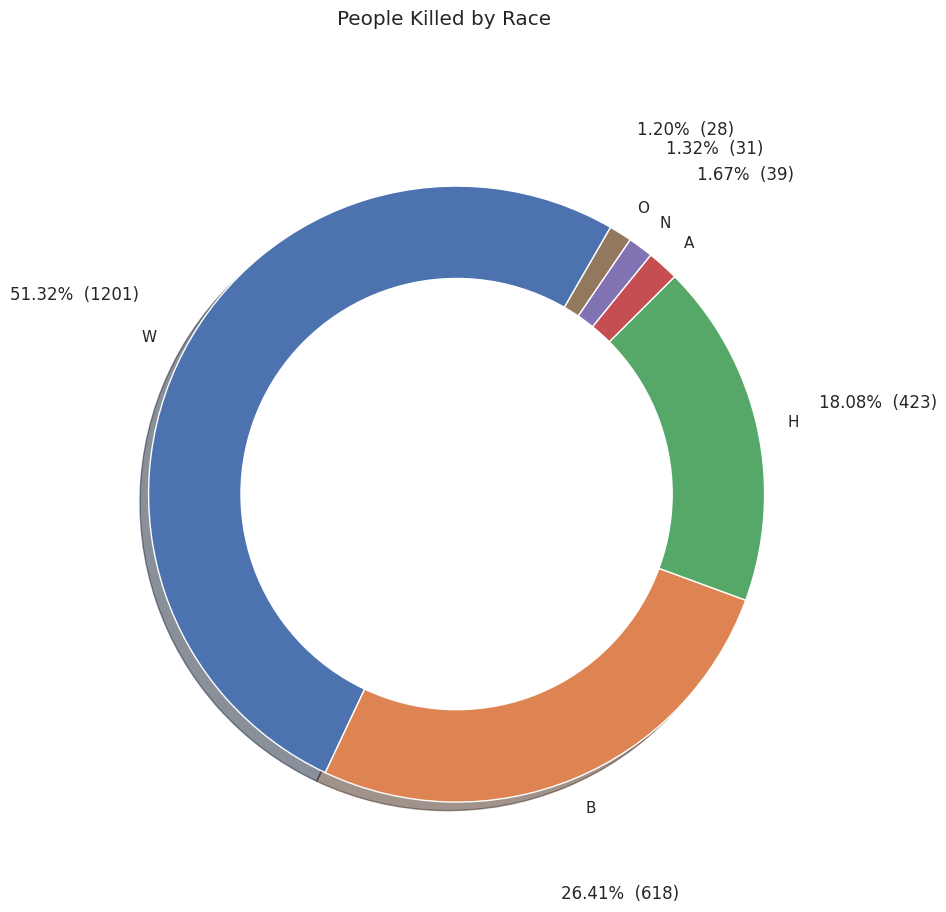

In [46]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10))
plt.suptitle('People Killed by Race')
plt.pie(killed, labels=killed.index, autopct=make_autopct(killed), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [47]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender

M    2428
F     107
Name: gender, dtype: int64

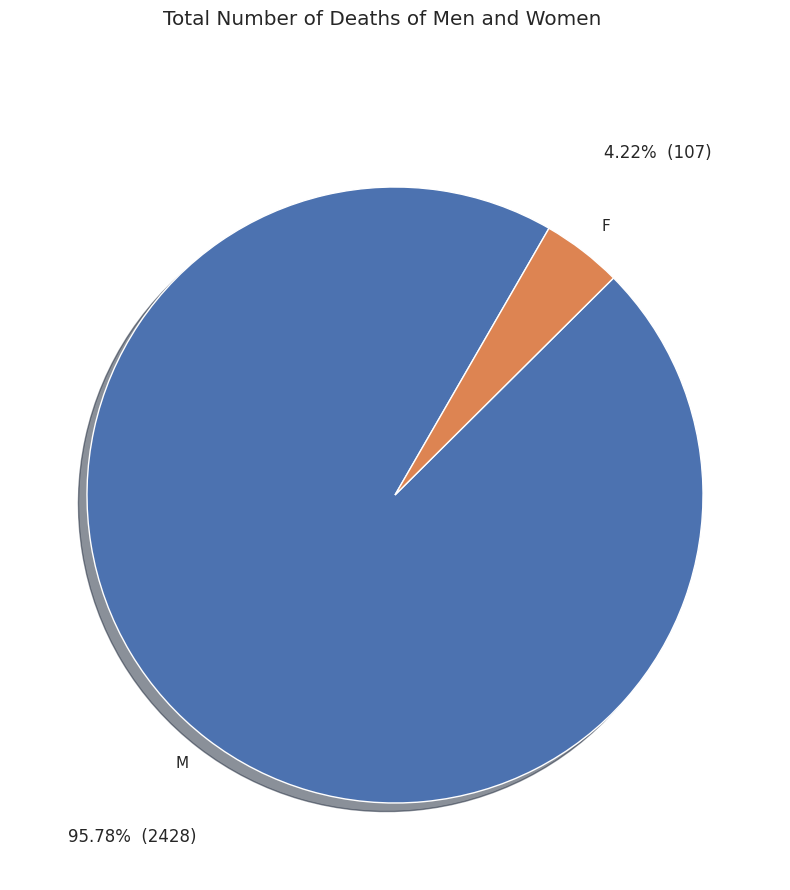

In [48]:
plt.figure(figsize=(10,10))
plt.suptitle('Total Number of Deaths of Men and Women')
plt.pie(killed_gender, labels=killed_gender.index, autopct=make_autopct(killed_gender), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [49]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


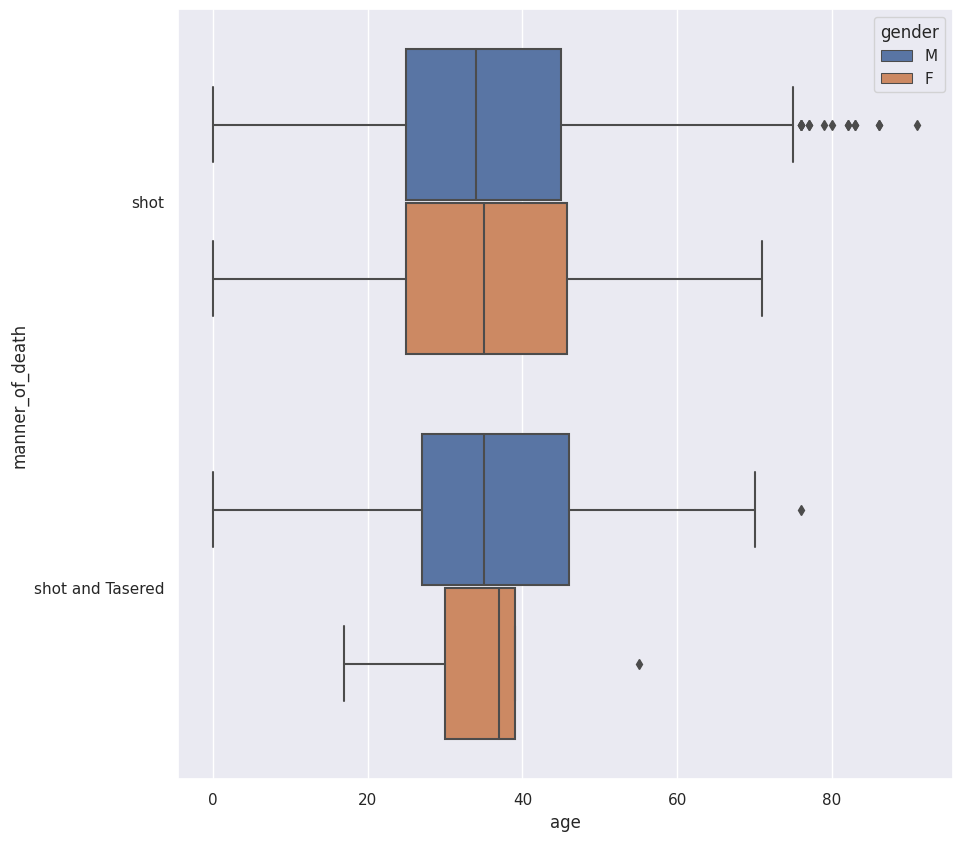

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

In [51]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [52]:
armed = df_fatalities.copy()

weapons = ['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']

armed.armed = armed.armed.replace(weapons, 'armed')

armed.armed.unique()

array(['armed', 'unarmed', nan], dtype=object)

In [53]:
percentage = armed.armed.value_counts()
percentage

armed      2355
unarmed     171
Name: armed, dtype: int64

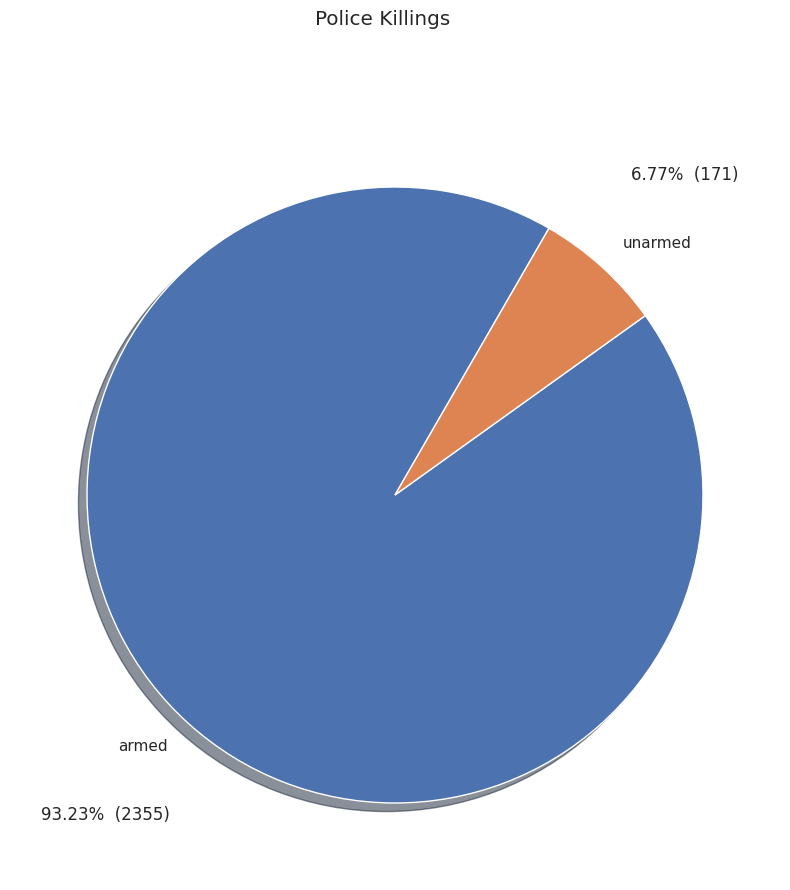

In [54]:
plt.figure(figsize=(10,10))
plt.suptitle('Police Killings')
plt.pie(percentage, labels=percentage.index, autopct=make_autopct(percentage), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

plt.show()

In [55]:
arm = df_fatalities.armed.value_counts()
arm

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

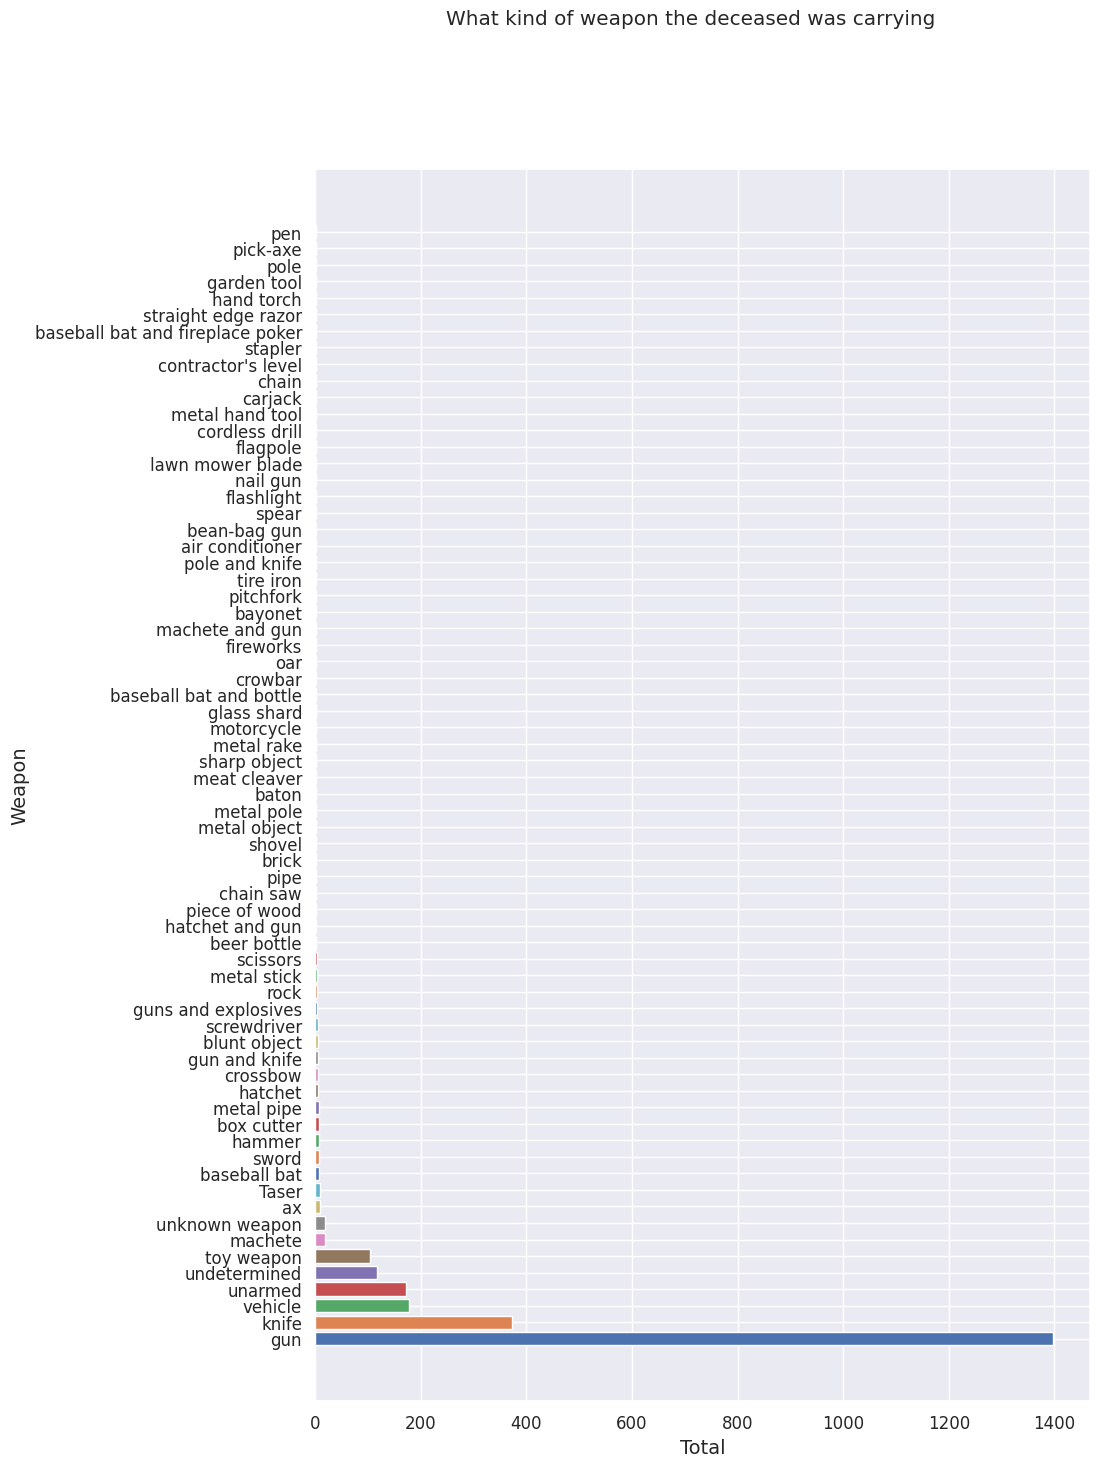

In [56]:
plt.figure(figsize=(10,16))
plt.suptitle('What kind of weapon the deceased was carrying')
plt.ylabel('Weapon', fontsize=14)
plt.xlabel('Total', fontsize=14)

for n in range(len(arm)):
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.barh(arm.index[n], arm[n])

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [57]:
junior = df_fatalities.loc[df_fatalities['age'] < 25]
under = junior.id.count()

senior = df_fatalities.loc[df_fatalities['age'] > 25]
over = senior.id.count()

print(f"{round((under / over) * 100)}% of people killed were under 25 years old.")

28% of people killed were under 25 years old.


In [58]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

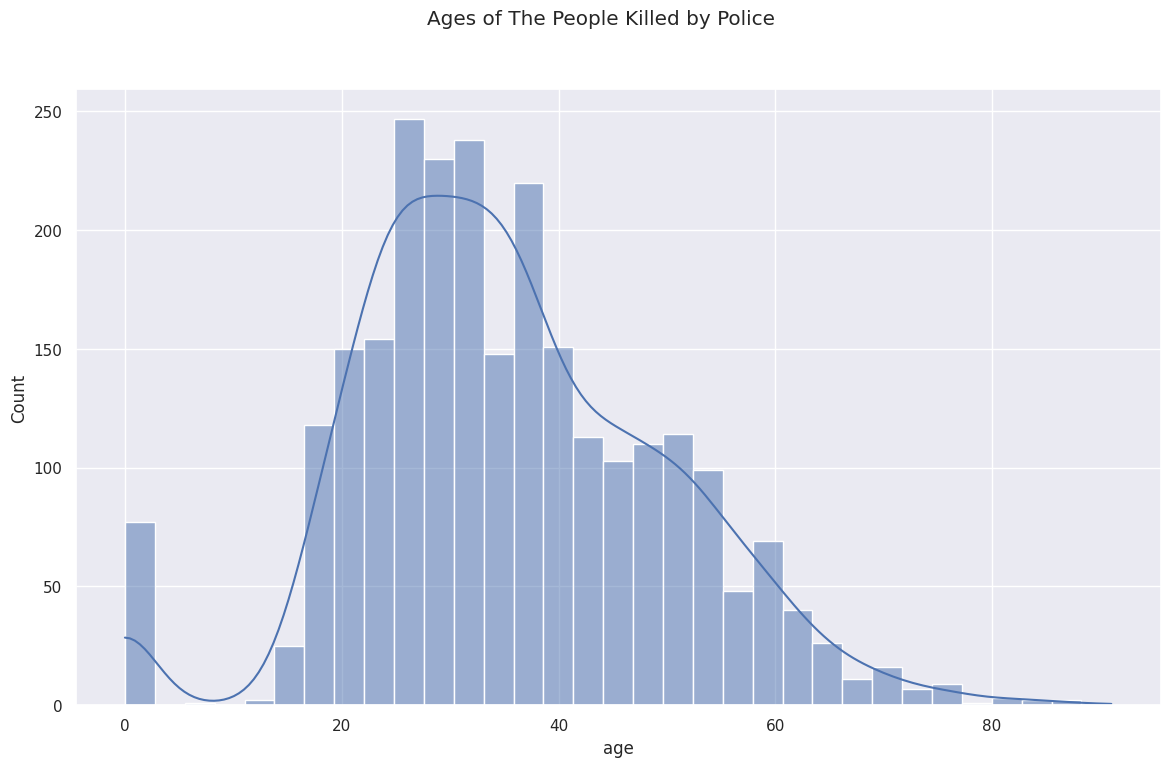

In [59]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

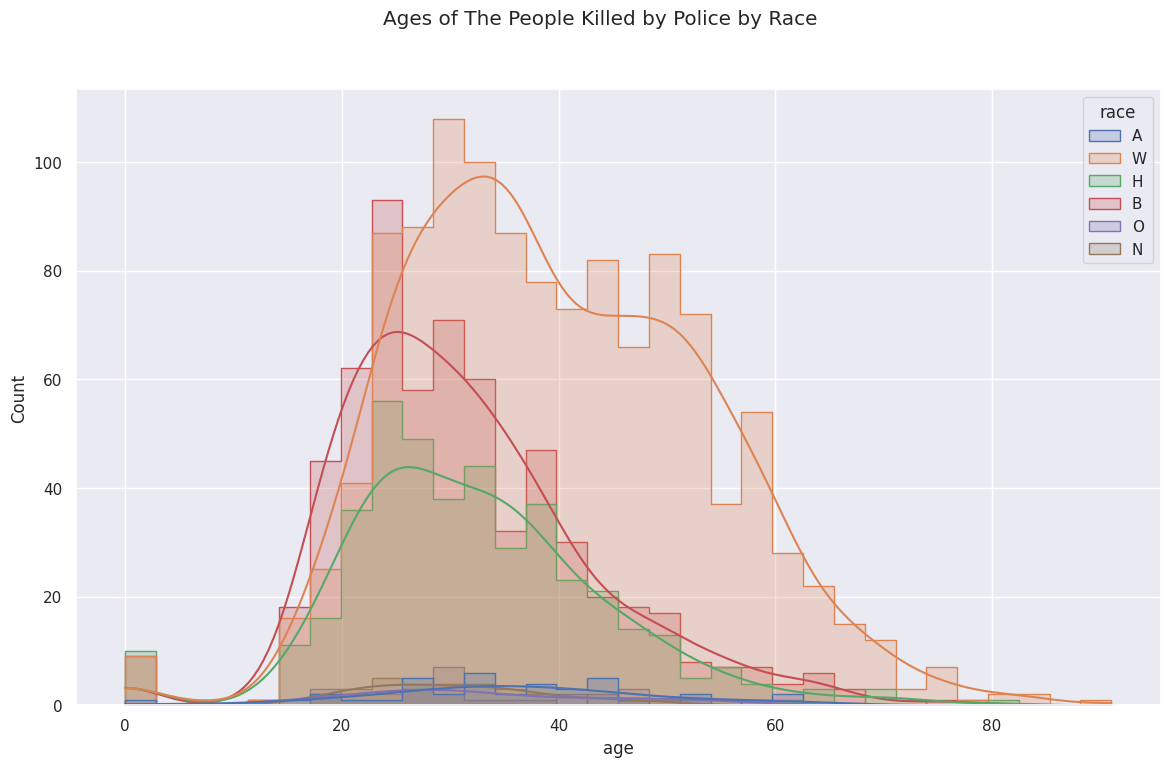

In [60]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='step')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [61]:
race_kill = df_fatalities.race.value_counts()
race_kill

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

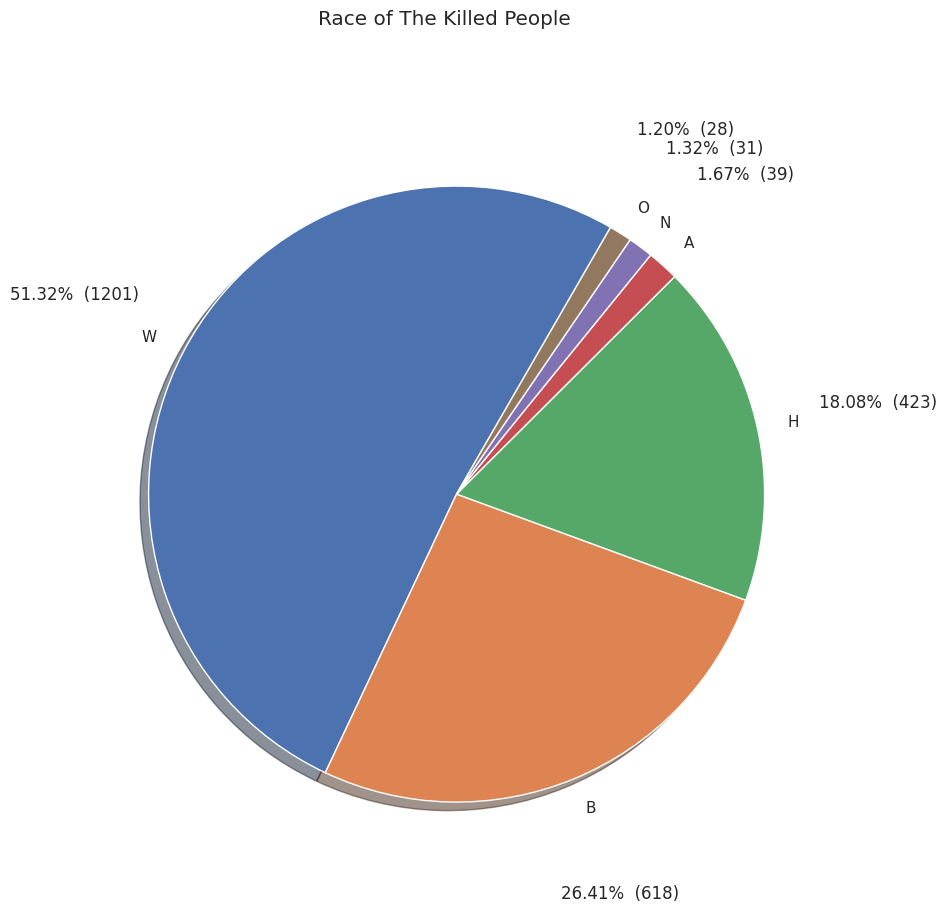

In [62]:
plt.figure(figsize=(10,10))
plt.suptitle('Race of The Killed People')
plt.pie(race_kill, labels=race_kill.index, autopct=make_autopct(race_kill), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [63]:
df_fatalities
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

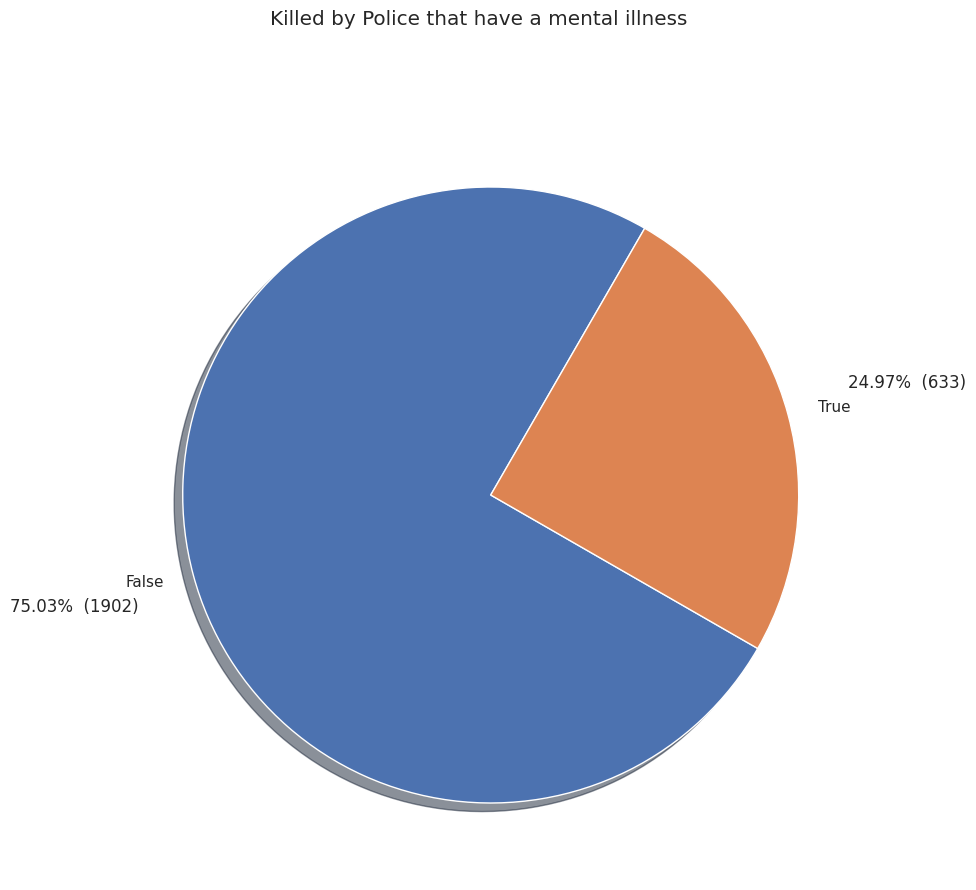

In [64]:
plt.figure(figsize=(10,10))
plt.suptitle('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct=make_autopct(mental), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [65]:
cities = df_fatalities.city.value_counts().head(10)
cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

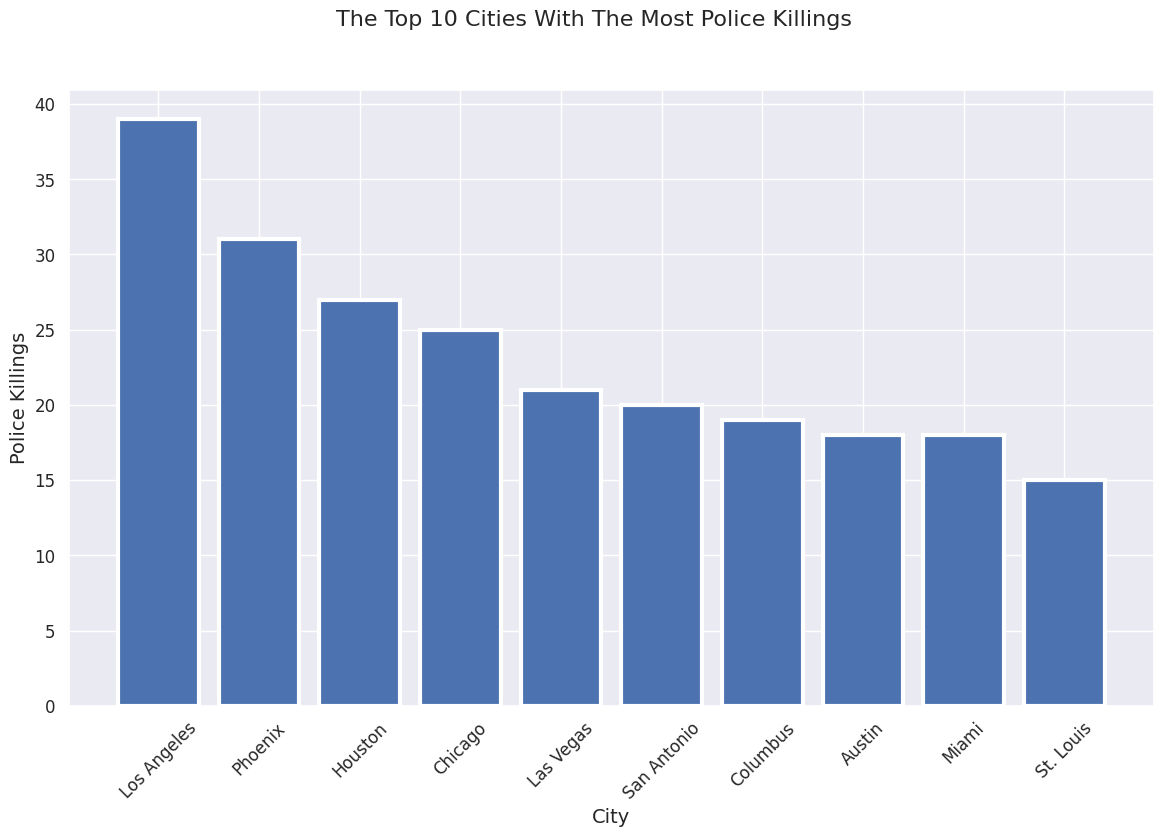

In [66]:
plt.figure(figsize=(14,8))
plt.suptitle('The Top 10 Cities With The Most Police Killings', fontsize=16)
plt.ylabel('Police Killings', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.bar(cities.index, cities, label=cities.index, linewidth=3)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

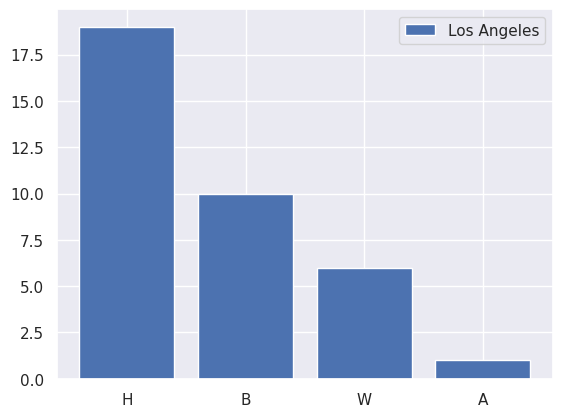

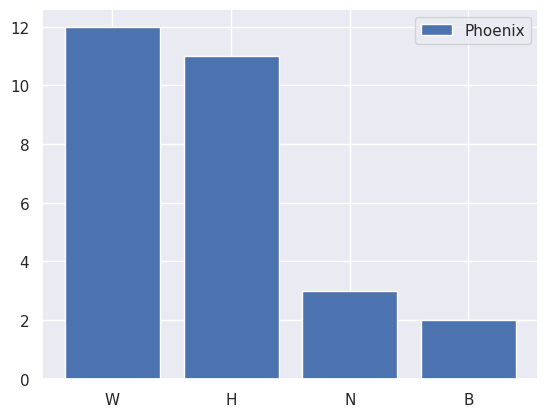

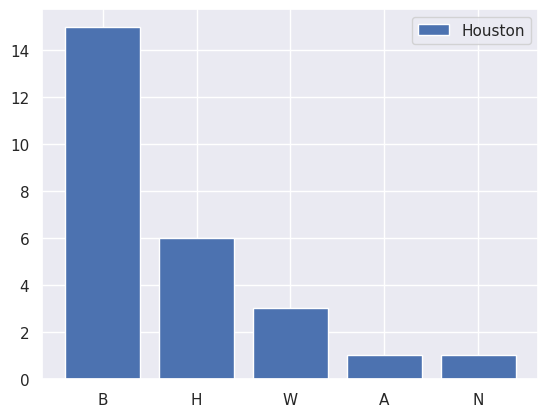

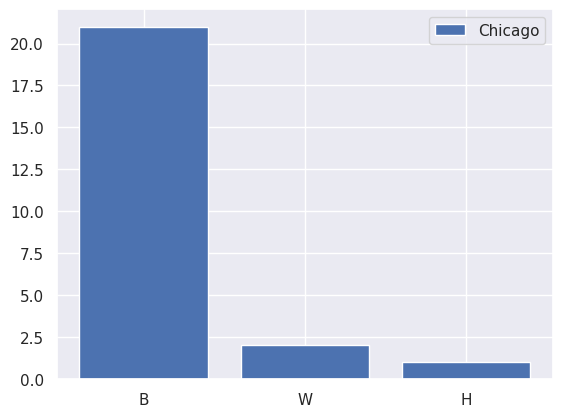

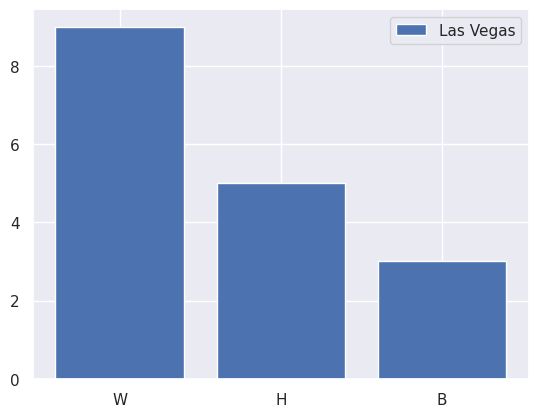

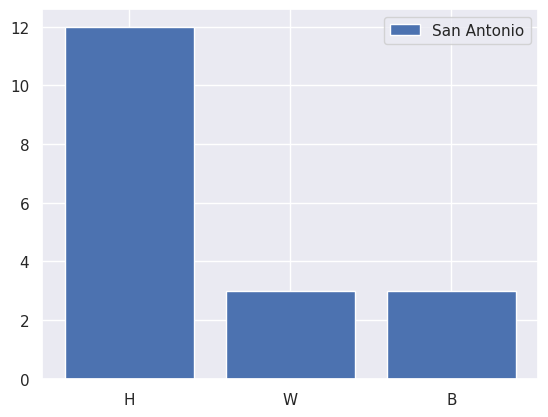

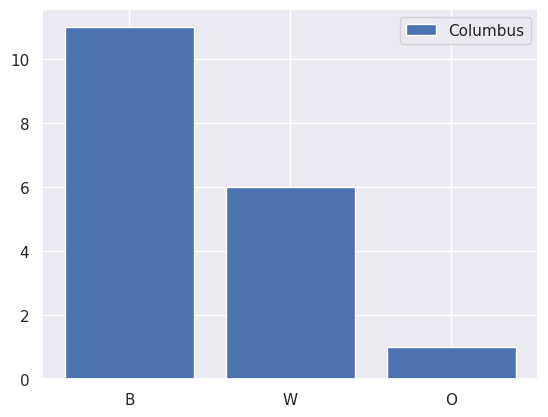

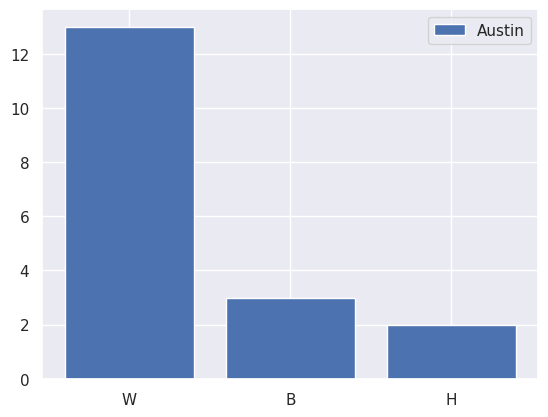

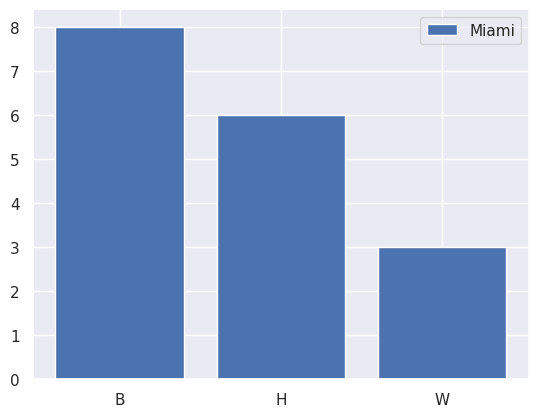

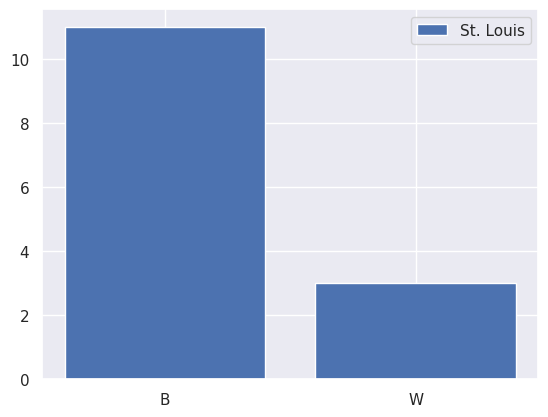

In [67]:
top = df_fatalities[['city', 'race']]
for c in cities.index:
    top_cities = top.loc[top['city'] == c]
    city = top_cities.race.value_counts()
    plt.bar(city.index, city, label=c)
    plt.legend(loc='best')
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [68]:
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_to_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
WI     43
IN     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

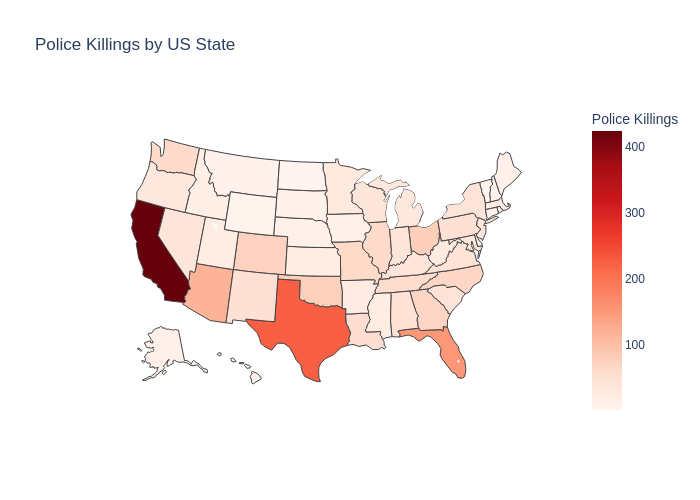

In [69]:
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.index,
    z = states_to_map,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa',
)

fig.show("png")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [70]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date, infer_datetime_format=True).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [71]:
history = monthly_fatalities.groupby('date').size()
history

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

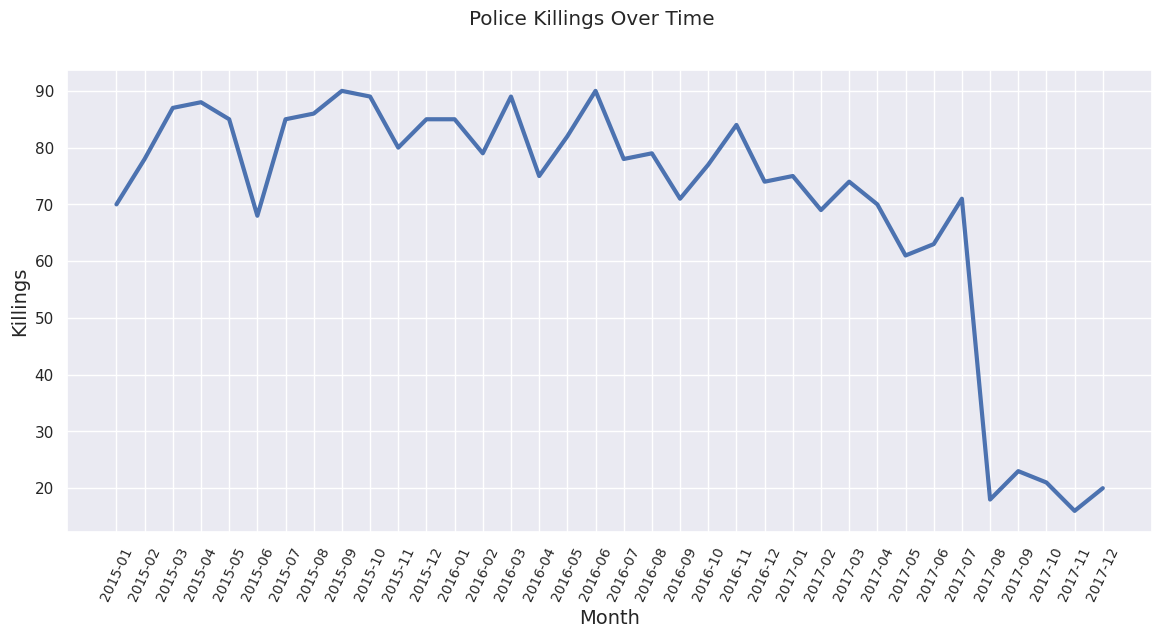

In [72]:
plt.figure(figsize=(14,6))
plt.plot(history.index, history, linewidth=3)
plt.xticks(ticks=history.index, fontsize=10, rotation=65)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).